In [39]:
import matplotlib.pyplot as plt
import serial
import time
from IPython.display import display, Javascript
%matplotlib notebook
plt.rcParams['animation.html']='jshtml'

In [40]:
# #Plot window
# fig=plt.figure()
# ax=fig.add_subplot(111)
# fig.show()

In [41]:
import time
import rtmidi
import numpy as np



def send_midi_notes(note_velocities, duration=1, port_number=1, is_minor=False):
    """
    Send MIDI note-on messages followed by note-off messages after a specified duration.

    Parameters:
        note_velocities (list of tuples): List of tuples containing (note_number, velocity) pairs.
        duration (0float): Duration in seconds to hold the notes before sending the note-off messages.
        port_number (int): Index of the MIDI output port to use.
        is_minor (bool): Flag indicating whether to use the C minor scale.
    """
    
    # Define MIDI notes for C major scale
    C_MAJOR_SCALE = [60, 62, 64, 65, 67, 69, 71, 72]

    # Define MIDI notes for C minor scale
    C_MINOR_SCALE = [60, 62, 63, 65, 67, 68, 70, 72]
    # Choose the scale
    scale = C_MINOR_SCALE if is_minor else C_MAJOR_SCALE

    # Create a MIDI output port
    midi_out = rtmidi.MidiOut()
    midi_out.open_port(port_number)  # Adjust the port number as needed

    # Calculate the note-off timestamp
    note_off_timestamp = time.time() + duration

    try:
        # Send note-on messages
        for note, velocity in note_velocities:
            note_on = [0x90, scale[note % len(scale)], velocity]
            midi_out.send_message(note_on)

        # Sleep until the note-off timestamp
        while time.time() < note_off_timestamp:
            time.sleep(0.01)

        # Send note-off messages
        for note, _ in note_velocities:
            note_off = [0x80, scale[note % len(scale)], 0]
            midi_out.send_message(note_off)
    finally:
        # Close the MIDI output port
        del midi_out

# # Example usage:
# while True:
#     user_input = input("Enter 0 to switch to C major scale (slow tempo), 1 to switch to C minor scale (fast tempo), or any other key to continue: ")
#     is_minor = user_input == '1'
    
#     tempo_range = (1, 3) if is_minor else (4, 6)  # Adjust tempo based on scale

#     for _ in range(4):
#         # Generate random notes within the range of C major or C minor scale
#         notes = [(np.random.randint(0, len(C_MAJOR_SCALE)), np.random.randint(40, 90))]
#         duration = np.random.randint(*tempo_range)  # Adjust duration based on tempo
#         send_midi_notes(notes, duration=duration, is_minor=is_minor if user_input in ('0', '1') else False)


In [42]:

# # Establish serial connection with Arduino
# ser = serial.Serial('/dev/cu.usbmodem141201', 9600)  # Change 'COM3' to the appropriate port

# # Initialize empty lists for data
# x_data = []
# y_data = []

# i=0

# try:
#     while True:
#         data = ser.readline().decode().strip()
#         if data:
#         # Convert data to integer
#             value = int(data)
#             # Append data to lists
#             x_data.append(i)
#             y_data.append(value)
#             # Sound Generation
            
#             if i>10:
#                 if y_data[-1] - y_data[-2] == 1:
#                     print('true')
#                     user_input = 1
#                     is_minor = user_input == '1'

#                     tempo_range = (1, 3) if is_minor else (4, 6)  # Adjust tempo based on scale

#                     for _ in range(4):
#                         # Generate random notes within the range of C major or C minor scale
#                         notes = [(np.random.randint(0, len(C_MAJOR_SCALE)), np.random.randint(40, 90))]
#                         duration = np.random.randint(*tempo_range)  # Adjust duration based on tempo
#                         send_midi_notes(notes, duration=duration, is_minor=is_minor if user_input in ('0', '1') else False)

#                 elif y_data[-1] - y_data[-2] == -1: 
#                     print('false')
#                     user_input = 0
#                     is_minor = user_input == '1'

#                     tempo_range = (1, 3) if is_minor else (4, 6)  # Adjust tempo based on scale

#                     for _ in range(4):
#                         # Generate random notes within the range of C major or C minor scale
#                         notes = [(np.random.randint(0, len(C_MAJOR_SCALE)), np.random.randint(40, 90))]
#                         duration = np.random.randint(*tempo_range)  # Adjust duration based on tempo
#                         send_midi_notes(notes, duration=duration, is_minor=is_minor if user_input in ('0', '1') else False)
#             # Plot data
#             ax.plot(x_data,y_data,color='b')
#             fig.canvas.draw()
#             ax.set_xlim(left=max(0, i-50), right=i+50)
#             time.sleep(0.01)
#             i+=1
            
# except KeyboardInterrupt:
#     # Close serial connection
#     ser.close()

# plt.close()

<IPython.core.display.Javascript object>


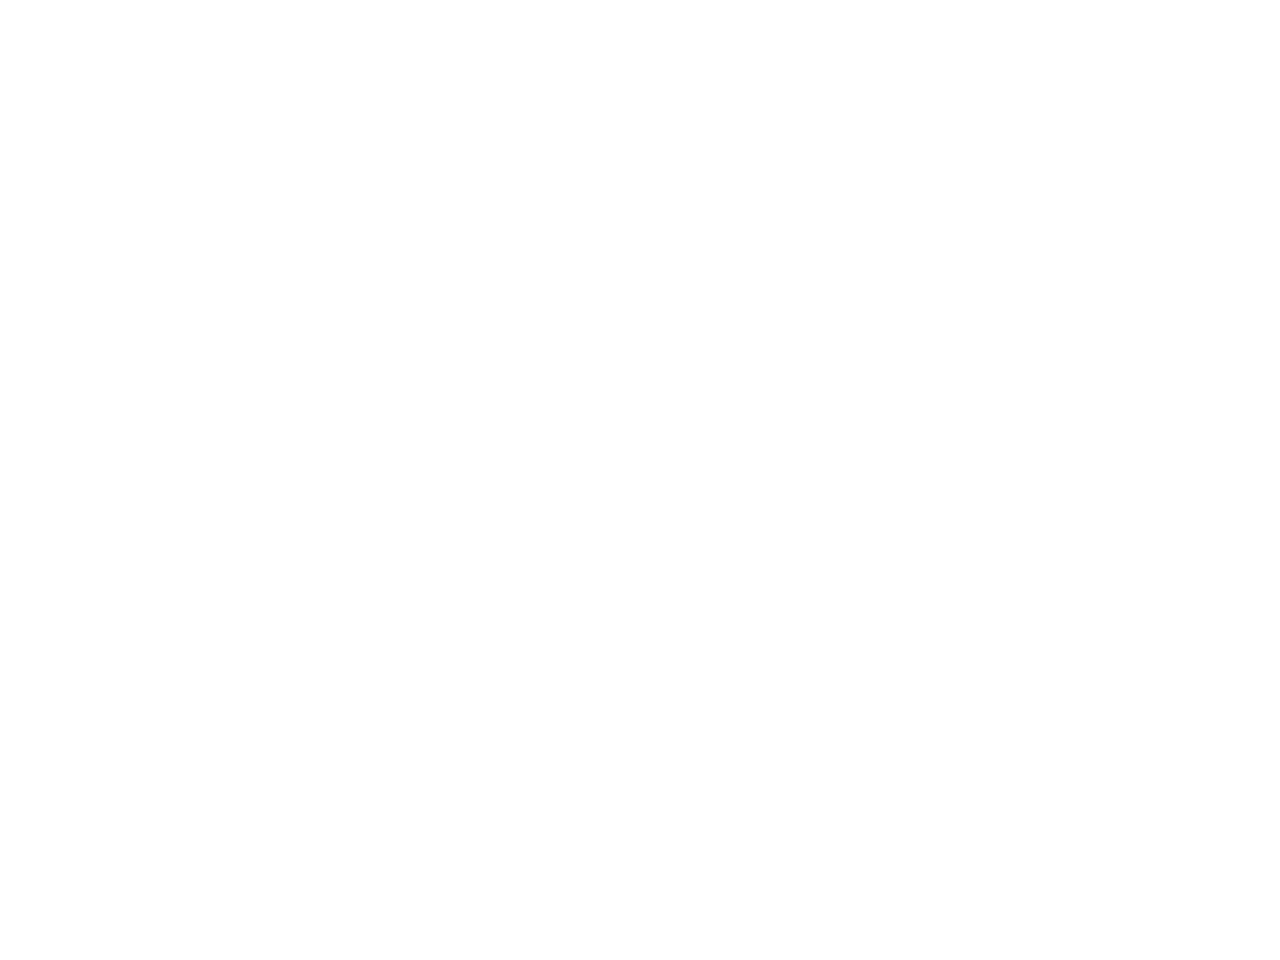

Transition from 1 to 0
Transition from 0 to 1
In the loop
In the loop


In [43]:
import serial
import numpy as np
import time
import matplotlib.pyplot as plt

# Define C major scale
C_MAJOR_SCALE = [0, 2, 4, 5, 7, 9, 11]

# Function to send MIDI notes
def send_midi_notes(notes, duration, is_minor=False):
    # Placeholder function to send MIDI notes
    pass

# Establish serial connection with Arduino
ser = serial.Serial('/dev/cu.usbmodem141201', 9600)  # Change 'COM3' to the appropriate port

# Initialize empty lists for data
x_data = []
y_data = []

i = 0

try:
    while True:
        data = ser.readline().decode().strip()
        if data:
            # Convert data to integer
            value = int(data)
            # Append data to lists
            x_data.append(i)
            y_data.append(value)
            # Sound Generation
            if i > 0:
                if y_data[-1] == 1 and y_data[-2] == 0:  # Signal transition from 0 to 1
                    print('Transition from 0 to 1')
                    user_input = 1
                    is_minor = False  # Major chord for transition from 0 to 1

                    tempo_range = (4, 6)  # Slow tempo

                    for _ in range(4):
                        # Generate random notes within the range of C major scale
                        notes = [(np.random.choice(C_MAJOR_SCALE), np.random.randint(40, 90))]
                        duration = np.random.randint(*tempo_range)  # Adjust duration based on tempo
                        send_midi_notes(notes, duration=duration, is_minor=is_minor)
                        time.sleep(4)
                        print('In the loop')

                elif y_data[-1] == 0 and y_data[-2] == 1:  # Signal transition from 1 to 0
                    print('Transition from 1 to 0')
                    user_input = 0
                    is_minor = True  # Minor chord for transition from 1 to 0

                    tempo_range = (1, 3)  # Fast tempo

                    for _ in range(4):
                        # Generate random notes within the range of C major scale
                        notes = [(np.random.choice(C_MAJOR_SCALE), np.random.randint(40, 90))]
                        duration = np.random.randint(*tempo_range)  # Adjust duration based on tempo
                        send_midi_notes(notes, duration=duration, is_minor=is_minor)

            # Plot data
            plt.plot(x_data, y_data, color='b')
            plt.xlim(left=max(0, i - 50), right=i + 50)
            plt.pause(0.01)
            i += 1

except KeyboardInterrupt:
    # Close serial connection
    ser.close()

plt.close()


In [ ]:
import serial
import numpy as np
import time
import matplotlib.pyplot as plt
import rtmidi

def send_midi_notes(duration=1, port_number=1, is_minor=False):
    """
    Send MIDI note-on messages followed by note-off messages after a specified duration.

    Parameters:
        duration (float): Duration in seconds to hold the notes before sending the note-off messages.
        port_number (int): Index of the MIDI output port to use.
        is_minor (bool): Flag indicating whether to use the C minor scale.
    """
    # Define MIDI notes for C major scale
    C_MAJOR_SCALE = [60, 62, 64, 65, 67, 69, 71, 72]

    # Define MIDI notes for C minor scale
    C_MINOR_SCALE = [60, 62, 63, 65, 67, 68, 70, 72]
    # Choose the scale
    scale = C_MINOR_SCALE if is_minor else C_MAJOR_SCALE

    # Create a MIDI output port
    midi_out = rtmidi.MidiOut()
    midi_out.open_port(port_number)  # Adjust the port number as needed

    # Calculate the note-off timestamp
    note_off_timestamp = time.time() + duration

    try:
        # Send note-on messages
        for note in scale:
            note_on = [0x90, note, 80]  # Assuming velocity 80 for note-on
            midi_out.send_message(note_on)

        # Sleep until the note-off timestamp
        while time.time() < note_off_timestamp:
            time.sleep(0.01)

        # Send note-off messages
        for note in scale:
            note_off = [0x80, note, 0]  # Velocity 0 for note-off
            midi_out.send_message(note_off)
    finally:
        # Close the MIDI output port
        del midi_out

# Establish serial connection with Arduino
ser = serial.Serial('/dev/cu.usbmodem141201', 9600)  # Change 'COM3' to the appropriate port

# Initialize empty lists for data
x_data = []
y_data = []

i = 0

try:
    while True:
        data = ser.readline().decode().strip()
        if data:
            # Convert data to integer
            value = int(data)
            # Append data to lists
            x_data.append(i)
            y_data.append(value)
            # Sound Generation
            if i > 0:
                if y_data[-1] == 1 and y_data[-2] == 0:  # Signal transition from 0 to 1
                    print('Transition from 0 to 1')
                    user_input = 1
                    is_minor = False  # Major chord for transition from 0 to 1

                    tempo_range = (4, 6)  # Slow tempo

                    
                    send_midi_notes(duration=np.random.randint(*tempo_range), is_minor=is_minor)

                elif y_data[-1] == 0 and y_data[-2] == 1:  # Signal transition from 1 to 0
                    print('Transition from 1 to 0')
                    user_input = 0
                    is_minor = True  # Minor chord for transition from 1 to 0

                    tempo_range = (1, 3)  # Fast tempo

                    
                    send_midi_notes(duration=np.random.randint(*tempo_range), is_minor=is_minor)

            # Plot data
            plt.plot(x_data, y_data, color='b')
            plt.xlim(left=max(0, i - 50), right=i + 50)
            plt.pause(0.01)
            i += 1

except KeyboardInterrupt:
    # Close serial connection
    ser.close()

plt.close()


<IPython.core.display.Javascript object>